In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from lib.widgets import interact_img_repr
from lib.plots import (
    plot_img_repr,
    plot_img_hist,
    plot_linear_contrast_enhance,
    plot_gamma_correct,
    plot_hist_equalize,
    plot_clahe
)
from lib.contrast_enhance import (
    linear_contrast_enhance,
    gamma_correct,
    hist_equalize,
    clahe,
)

# Image representation

An image is just a large table with numbers. Typically, we use 8-bits to represent each pixel value. When interpreted as unsigned integer values, these 8 bits range from 0 (darkest) to 255 (brightest).

In [5]:
interact_img_repr()

interactive(children=(Dropdown(description='img_file', options=('data/verona_bw.png', 'data/verona_color.jpg',…

In [6]:
cv2.imread('data/verona_gray.jpg').shape

(960, 1280, 3)

# Image histogram

A histogram counts how often each pixel value occurs in the image.

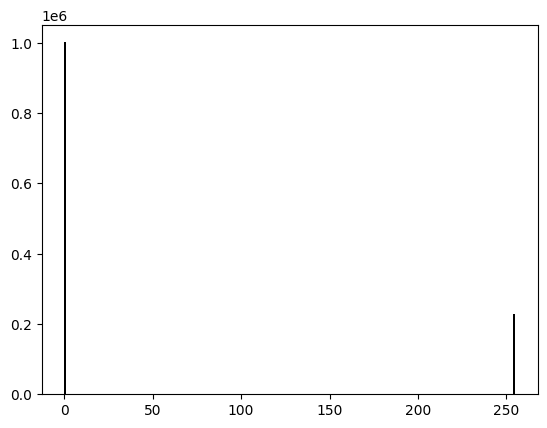

In [7]:
img_bw = cv2.imread('data/verona_bw.png', cv2.IMREAD_GRAYSCALE)

fig_bw, ax_bw = plt.subplots()
ax_bw.hist(img_bw.flatten(), bins=256, color='black');

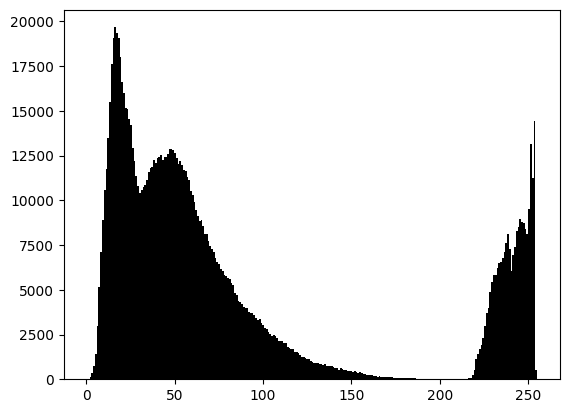

In [8]:
img_gray = cv2.imread('data/verona_gray.jpg', cv2.IMREAD_GRAYSCALE)

fig_gray, ax_gray = plt.subplots()
ax_gray.hist(img_gray.flatten(), bins=256, color='black');

A color image has multiple *channels*. A frequently-used way to represent colors is with a *red, green and blue* channel. When using `cv2.imread()`, we get a numpy array with 3 dimensions: a width, a height and 3 color channels. Note that, confusingly, OpenCV orders the color channels as *BGR* instead of the more commonly used *RGB*.

To convert BGR to RGB, you can use `cv2.cvtColor()`.

In [9]:
img_color = cv2.imread('data/verona_color.jpg')

# Convert BGR to RGB
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# Extract channels
red_channel = img_color[..., 0]
green_channel = img_color[..., 1]
blue_channel = img_color[..., 2]

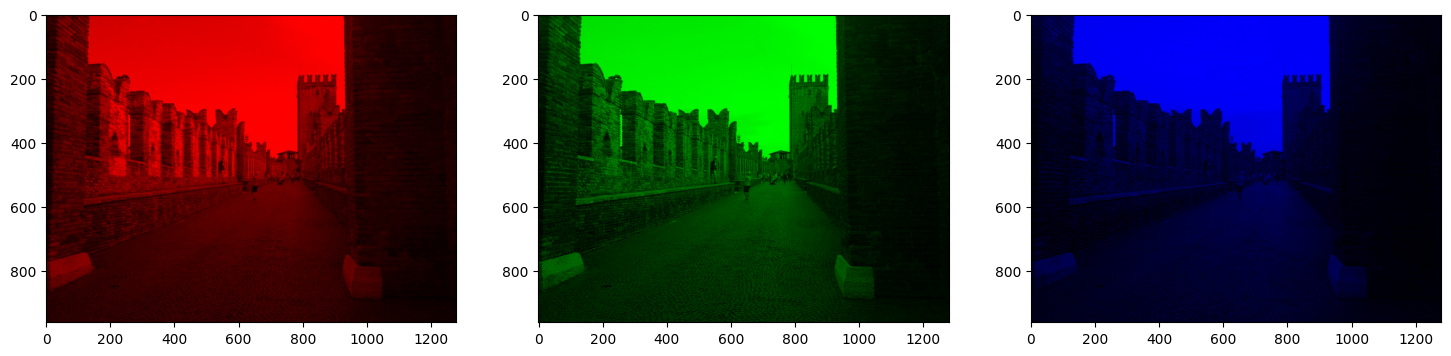

In [10]:
# Create array of zeros with same width and height
zeros = np.zeros(red_channel.shape, dtype=np.uint8)

# Create separate images with only red, green and blue channel
img_red = np.stack([red_channel, zeros, zeros], axis=2)
img_green = np.stack([zeros, green_channel, zeros], axis=2)
img_blue = np.stack([zeros, zeros, blue_channel], axis=2)

# Show images
fig, axes = plt.subplots(ncols=3, figsize=(3*6, 4))
axes[0].imshow(img_red)
axes[1].imshow(img_green)
axes[2].imshow(img_blue)

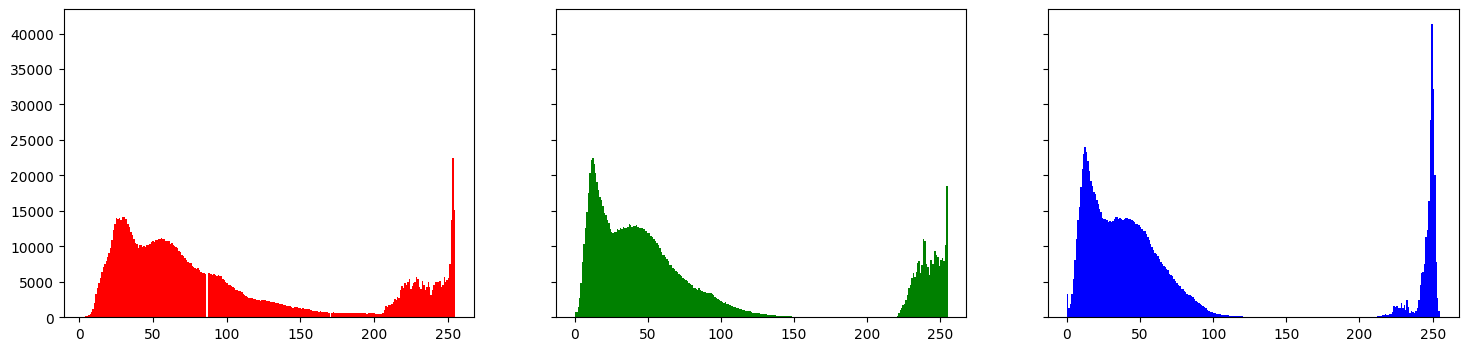

In [11]:
fig_color, axes_color = plt.subplots(ncols=3, figsize=(3*6, 4), sharey=True)

axes_color[0].hist(img_color[..., 0].flatten(), bins=256, color='red')
axes_color[1].hist(img_color[..., 1].flatten(), bins=256, color='green')
axes_color[2].hist(img_color[..., 2].flatten(), bins=256, color='blue');

## CIELAB color space

The CIELAB color space is another way to represent colors. The L-channel refers to the *lightness* of the pixel and the A and B channels are for colors.

It's intended as a *perceptually uniform* space, where a given numerical change corresponds to a similar perceived change in lightness and color.

There are other color spaces that implement a similar idea, e.g., YCbCr.

In [12]:
# Convert RGB to LAB
img_lab = cv2.cvtColor(img_color, cv2.COLOR_RGB2LAB)

# Extract channels
l_channel = img_lab[..., 0]
a_channel = img_lab[..., 1]
b_channel = img_lab[..., 2]

# Create separate images with only L, A and B channel
img_l = np.stack([l_channel, zeros + 128, zeros + 128], axis=2)
img_a = np.stack([zeros + 128, a_channel, zeros + 128], axis=2)
img_b = np.stack([zeros + 128, zeros + 128, b_channel], axis=2)

# Convert separate images to RGB for visualization
img_l = cv2.cvtColor(img_l, cv2.COLOR_LAB2RGB)
img_a = cv2.cvtColor(img_a, cv2.COLOR_LAB2RGB)
img_b = cv2.cvtColor(img_b, cv2.COLOR_LAB2RGB)

# Show images
fig, axes = plt.subplots(ncols=3, figsize=(3*6, 4))
axes[0].imshow(img_l)
axes[1].imshow(img_a)
axes[2].imshow(img_b)

# Linear contrast enhancement

We can enhance contrast by simply multiplying and adding all pixel values in the same way.

In [13]:
np.clip(np.array([250], dtype=np.uint8) + float(10), 0, 255)

array([255.])

In [14]:
img = cv2.imread('data/verona_color.jpg')
img = img[..., ::-1]  # Shorthand for cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

new_img = linear_contrast_enhance(img, alpha=2.0, beta=10)

plt.imshow(new_img)

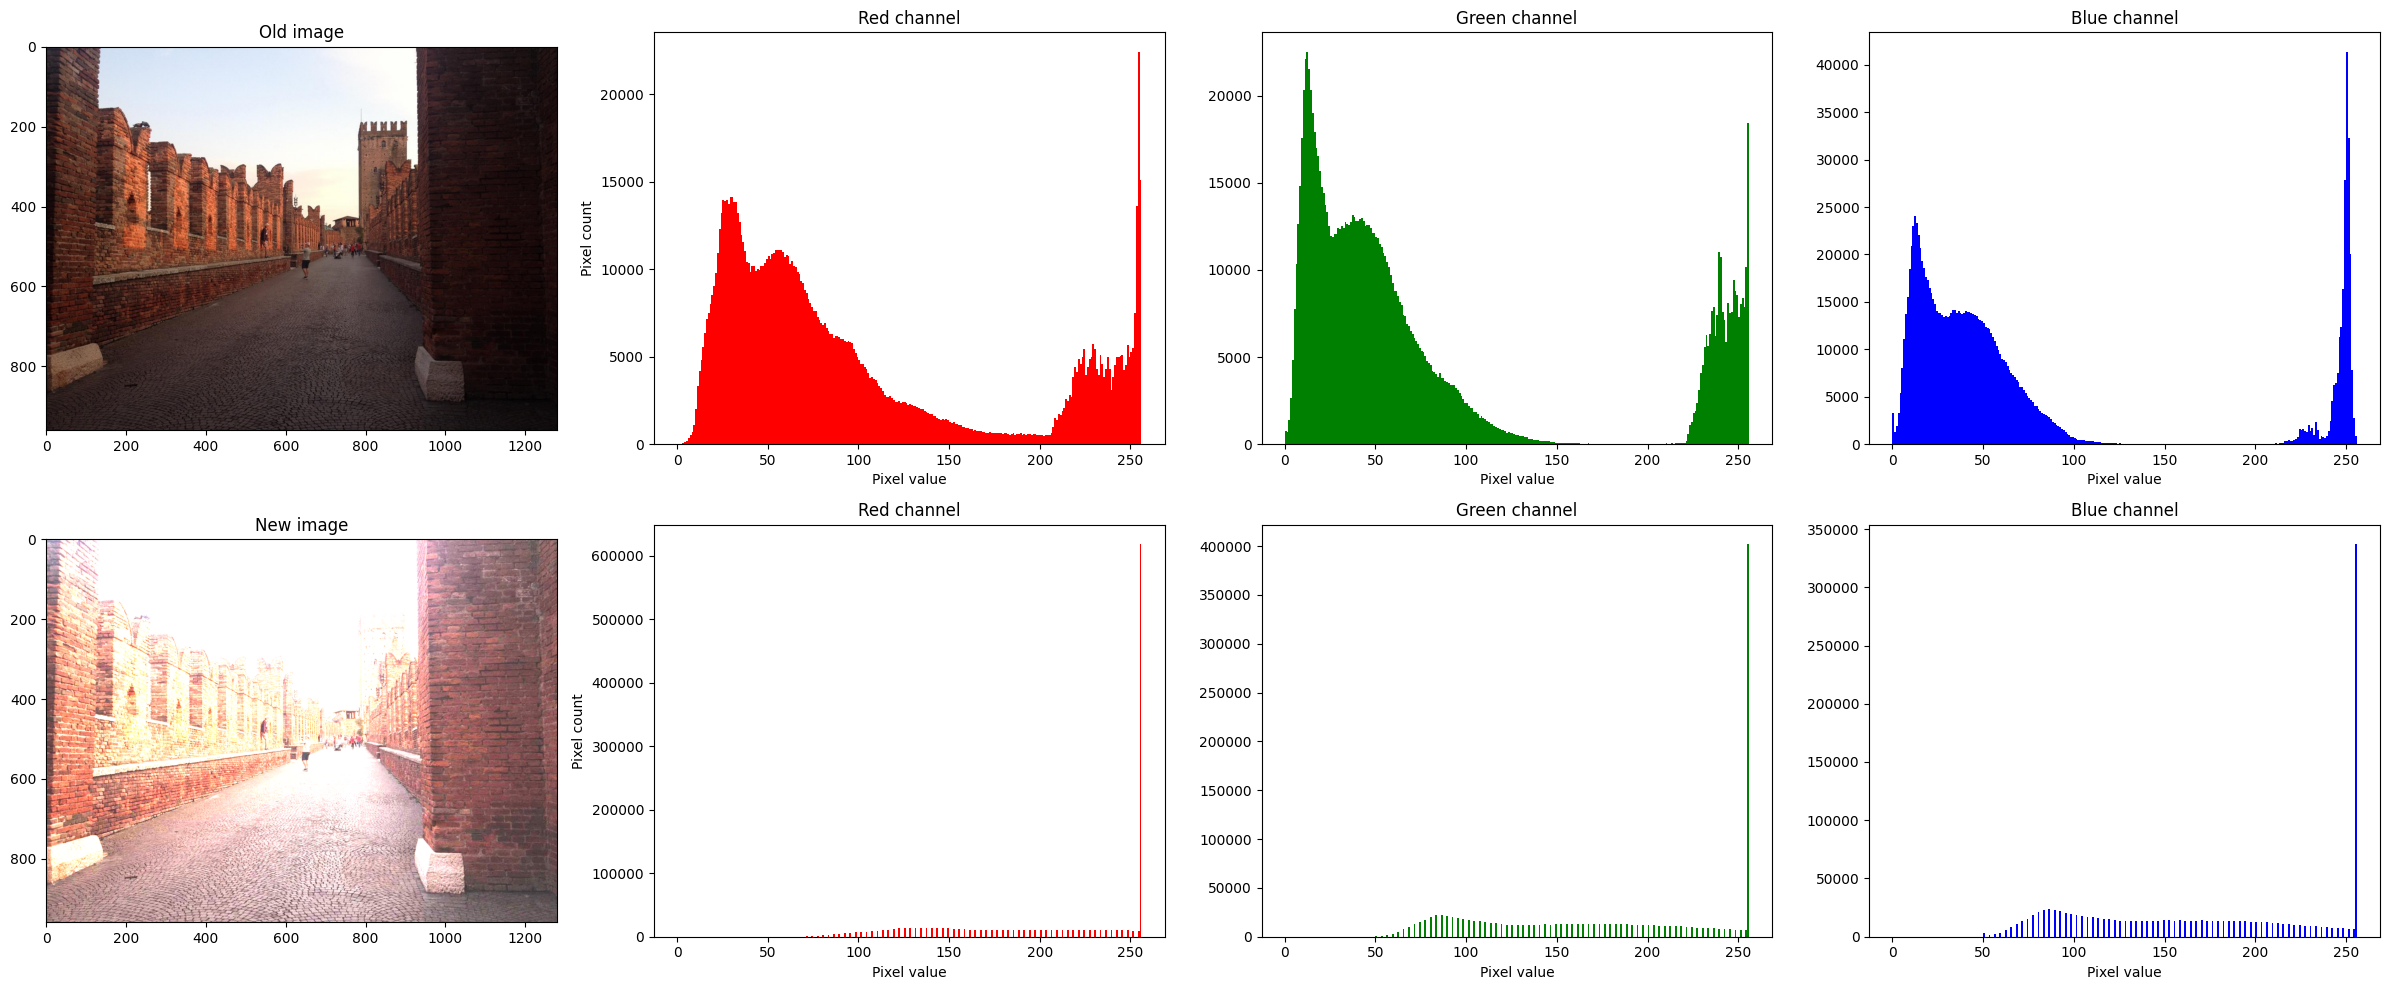

In [15]:
plot_linear_contrast_enhance(img, alpha=3.0, beta=50)

# Gamma correction

Our visual system is more sensitive to contrasts in the dark regions, so we might want to enhance particularly those contrasts. The "sensitivity" of our visual system can be approximated by a gamma function.

This is used, for example, to transform the output signal of a camera such that more bits are used for the darker regions.

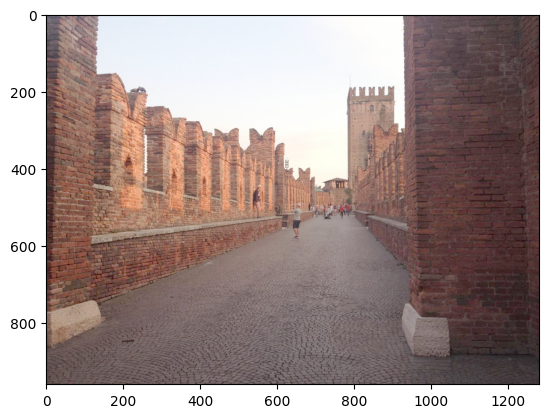

In [16]:
new_img = gamma_correct(img, gamma=0.5)

fig, ax = plt.subplots()
ax.imshow(new_img)

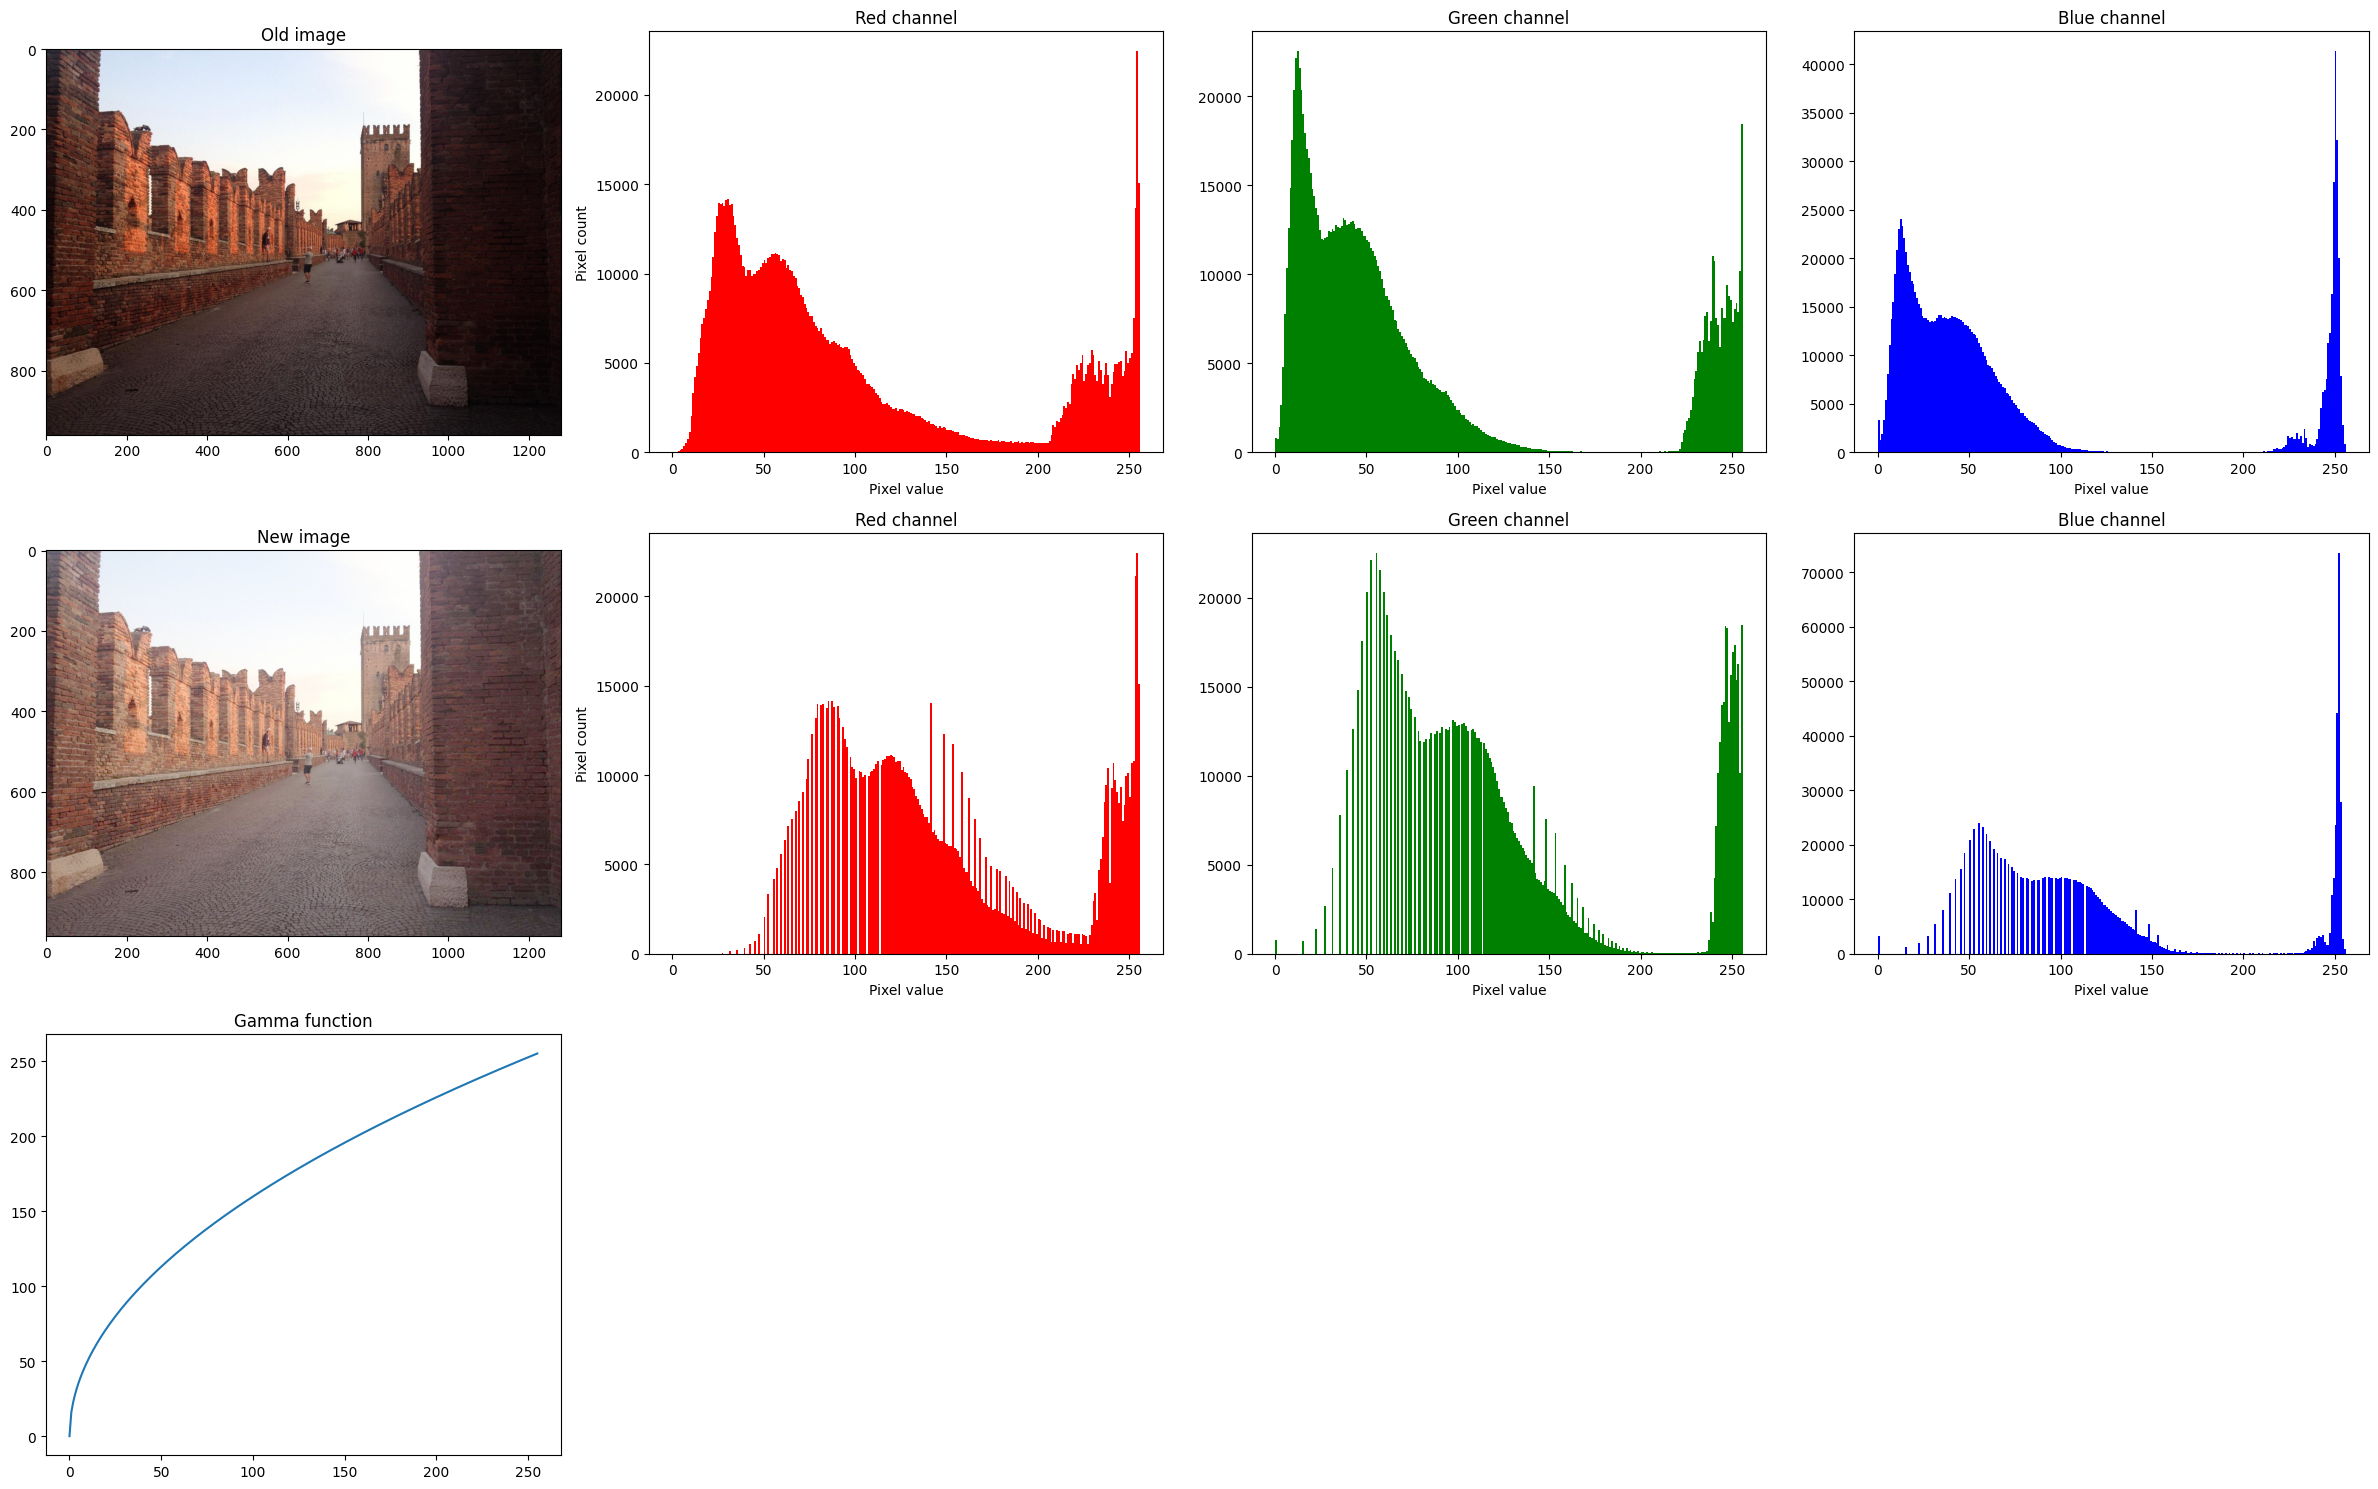

In [17]:
plot_gamma_correct(img, gamma=0.5)

# Histogram equalization

With histogram equalization, to which values we should map existing pixel values such that the histogram will be more uniformly distributed. This can be done by using the CDF of the histogram as a look-up table.

Note that we apply histogram equalization only to the lightness channel of the image, as this is what our eyes are most sensitive to.

In [18]:
new_img = hist_equalize(img)

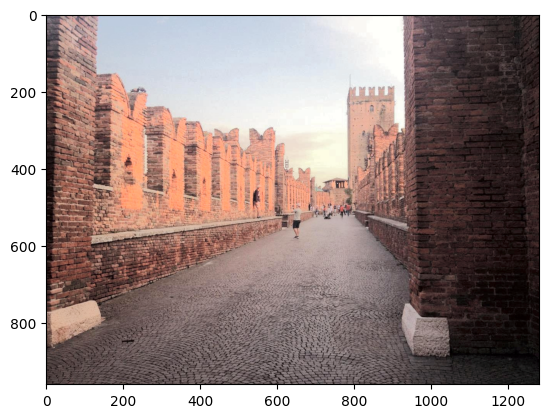

In [19]:
plt.imshow(new_img)

In [20]:
plot_hist_equalize(img)

# Contrast-limited adaptive histogram equalization (CLAHE)

Instead of remapping all pixels in the same way, we can split up the image into several regions and apply histogram equalization per region. To avoid blocks in the image, we apply the CDFs of the neighboring regions and calculate a weighted average, with weights proportional to distance to neighboring center pixels. This is **adaptive histogram equalization**.

To avoid noise in near-constant regions, we apply contrast limiting to the histograms before computing the CDFs.

In [21]:
# clip_limit: max peak in histogram, relative to the height of a uniform histogram
# grid_size: the number of tiles per row and column
new_img = clahe(img, clip_limit=2.0, grid_size=8)

plt.imshow(new_img)

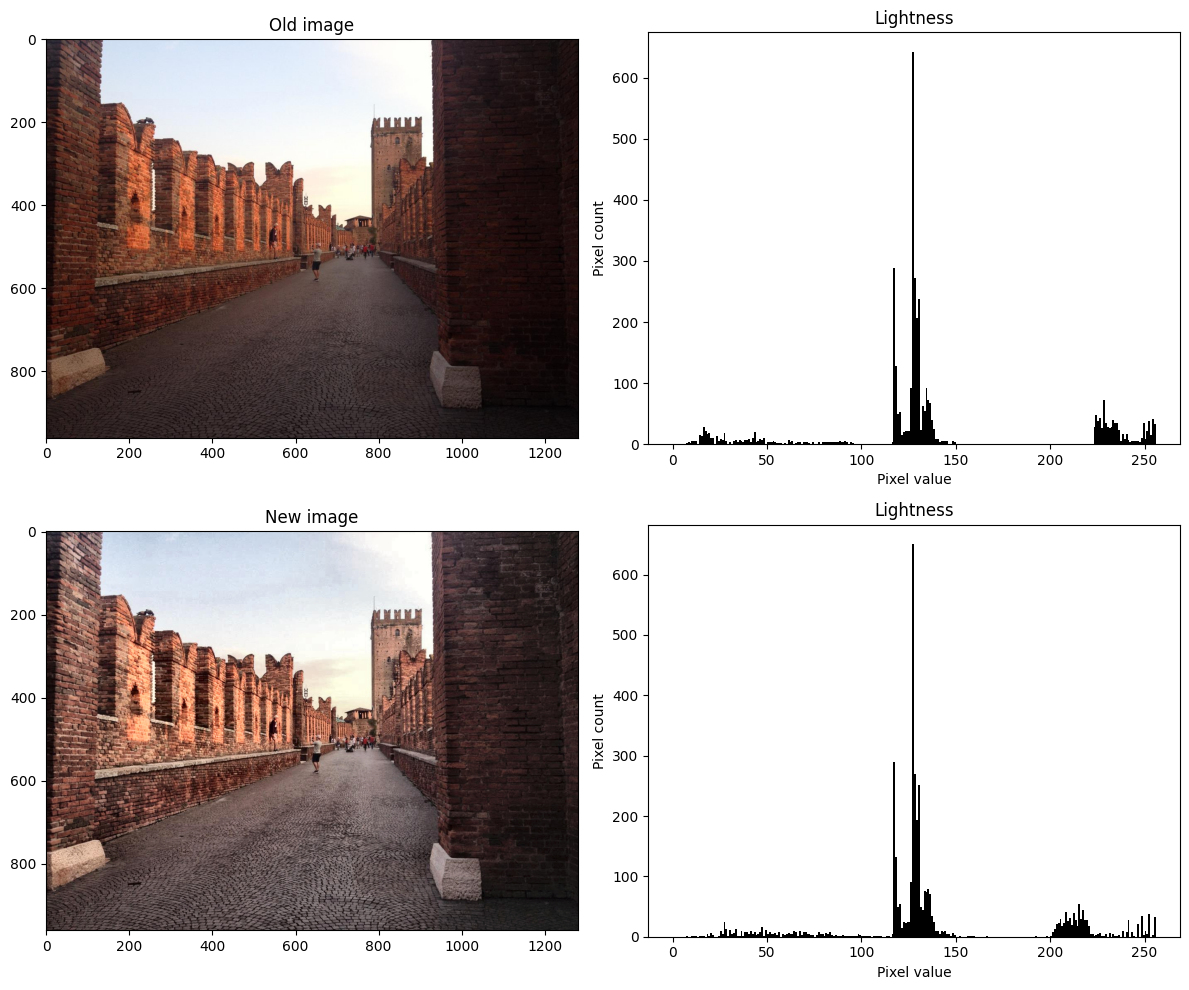

In [22]:
plot_clahe(img, clip_limit=2.0, grid_size=8)